 - The theory we are asked to test is:

$$
I = I_0 \exp \left( \frac{V}{V_0} \right) \\
$$

 - Taking the natural log of both sides gives:
$$
\ln I = \ln I_0 + \frac{V}{V_0}
$$

 - So plot of $V$ *vs.* $\ln I$ will have gradient $1/V_0$ and intercept $\ln I_0$

In [7]:
import numpy as np

# voltage equally spaced
voltage = np.arange(0.30, 0.86, 0.05)

# current values from problem sheet
current = np.array( [1.4e-7, 9.3e-7, 5.8e-6, 5.1e-5, 2.2e-4, 1.7e-3, 1.5e-2, 7.6e-2, 0.54, 3.6, 12, 25] )

# log current
ln_current = np.log( current )

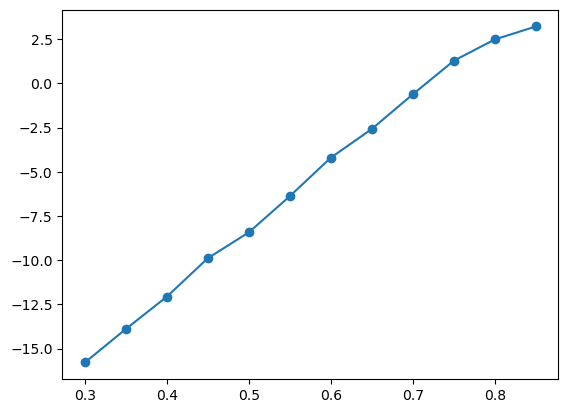

In [9]:
# make a plot
import matplotlib.pyplot as plt

plt.scatter( voltage, ln_current )
plt.plot( voltage, ln_current )

 - It looks like the linear trend starts to tail off (plateau) at the last two points 
 - So I'll remove the last two points as outliers

In [10]:
ln_current = ln_current[:-2]
voltage = voltage[:-2]

In [21]:
# now perform the least squares regression

# add a linear constant term to the design matrix
V = np.vstack([voltage, np.ones_like(voltage)]).T

# perform the linear regression (inverting matrix)
beta, residuals, rank, s = np.linalg.lstsq(V, ln_current, rcond=None)

slope, intercept = beta
print(slope, intercept)
print(residuals, rank, s)

37.9352885032936 -27.168229622314882
[0.15154016] 2 [3.57790226 0.40139181]


 - to get the standard error on these I can use the standard error of the residuals:
 $$
 \sigma_{R} = \sqrt{ \frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }
 $$
 where $y_i$ is the observed value and $\hat{y}_i$ is the predicted value

In [23]:
ln_current_pred = V @ beta
residuals = np.sum( (ln_current - ln_current_pred)**2 )
print(residuals)

0.15154016052365624


 - the standard error on the slope is
$$
\sigma_m = \frac{ \sigma_R }{ \sqrt{ \sum_{i=1}^n (x_i - \bar{x})^2} }
$$

In [31]:
sigma_slope = residuals / np.sqrt( np.sum( (voltage - np.mean(voltage))**2 ) )

 - the standard error on the intercept is
 $$
 \sigma_c = \sigma_R \sqrt{ \frac{1}{n} + \frac{\bar{x}^2}{ \sum_{i=1}^n (x_i -\bar{x})^2 } }
 $$

In [33]:
sigma_intercept = residuals * np.sqrt( 1/len(voltage) +
                                      np.mean(voltage)**2 / np.sum( (voltage - np.mean(voltage))**2 ) )

In [36]:
# print determined parameters and their errors
print(f'Slope:     ({slope:3.1f} +/- {sigma_slope:3.1f}) / V')
print(f'Intercept: ({intercept:3.1f} +/- {sigma_intercept:3.1f}) A')

Slope:     (37.9 +/- 0.3) / V
Intercept: (-27.2 +/- 0.2) A


In [38]:
# compute the value of V0 (inverse of gradient)
frac_err_slope = sigma_slope / slope
V0 = 1 / slope
V0_err = frac_err_slope * V0
print(f'V0 = ({V0:6.4f} +/- {V0_err:6.4f}) V' )


V0 = (0.0264 +/- 0.0002) V
